<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Передобработка-данных" data-toc-modified-id="Передобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Передобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Смещения-порога" data-toc-modified-id="Смещения-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Смещения порога</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов банка

**Иcходные данные**

Из Банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. 

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

В нашем распоряжении исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель исследования**

Построить модель с предельно большим значением F1-меры (не менее 0.59), способную спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**Ход исследования**
1. Обзор и подготовка данных.
2. Исследование задачи.
3. Балансировка данных.
4. Тестирование модели.

## Подготовка данных

Импортируем библиотеки.

In [61]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Обзор данных

Выполним обзор данных из файла.

In [62]:
pth1 = 'Churn.csv'
pth2 = '/datasets/Churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, index_col=0)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, index_col=0)
else:
    print('Что-то пошло не так :(')

print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB
None


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0


В таблице 10000 строк и 13 столбцов. Данные типов object, float64 и int64.

Согласно документации имеем:

**Признаки**
* `RowNumber` — индекс строки в данных.
* `CustomerId` — уникальный идентификатор клиента.
* `Surname` — фамилия.
* `CreditScore` — кредитный рейтинг.
* `Geography` — страна проживания.
* `Gender` — пол.
* `Age` — возраст.
* `Tenure` — сколько лет человек является клиентом банка.
* `Balance` — баланс на счёте.
* `NumOfProducts` — количество продуктов банка, используемых клиентом.
* `HasCrCard` — наличие кредитной карты.
* `IsActiveMember` — активность клиента.
* `EstimatedSalary` — предполагаемая зарплата.

**Целевой признак**
* `Exited` — факт ухода клиента.


По первичному обзору видим:
* В столбце `Tenure` присутствуют пропуски.
* Заголовки столбцов не соответствуют стилю.

Необходимо:
* Прверить (возможно заполнить) пропуски.
* Стилизовать заголовки.
* Проверить данные на дублекаты и аномалии.
* Преобразовать категориальные признаки.

### Передобработка данных

Стилизуем заголовки.

In [63]:
# создадим список с новыми именами колонок
new_name = []
for column in df.columns:
    column = re.sub('(?<=[a-zA-Z])([A-Z])', ('_' + '\g<1>'), column).lower()
    new_name.append(column)

# заменим имена на стилизиованные
df.columns = new_name

# проверим результат
print(df.columns)

Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')


Посмотрим строки с пропусками в `tenure`.

In [64]:
df[df['tenure'].isna()]

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
RowNumber,,,,,,,,,,,,,
31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0


Возможно, пропусками обозначены 0. Посмотрим список уникальных значений в `tenure`.

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

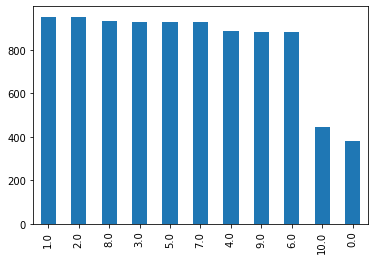

In [65]:
df['tenure'].value_counts().plot(kind='bar')
df['tenure'].value_counts()

Присутствуют значения от 0 до 10 лет. Причем число пропусков соизмеримо с отдельной категорией признака.

Новых клиентов (0) подозрительно мало. Возможно банк не занимается рекламой или в данном случае NaN - это 0. Однако по другим столбцам (`num_of_products`, `is_active_member`) не видно, чтобы клиенты как-то выбивались из общего распределения.

Заменим пропуски средним значением, чтобы выделить в отдельную категорию.

In [66]:
df['tenure'] = df['tenure'].fillna(df['tenure'].mean())
df['tenure'].value_counts()

1.00000     952
2.00000     950
8.00000     933
3.00000     928
5.00000     927
7.00000     925
4.99769     909
4.00000     885
9.00000     882
6.00000     881
10.00000    446
0.00000     382
Name: tenure, dtype: int64

Проверим данные на дублекаты и аномалии.

In [67]:
# смотрим все значения 
for column in df.columns:
    print(f'Список значений в столбце {column}:')
    print(df[column].value_counts())
    print()

Список значений в столбце customer_id:
15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: customer_id, Length: 10000, dtype: int64

Список значений в столбце surname:
Smith          32
Martin         29
Scott          29
Walker         28
Brown          26
               ..
Malloy          1
Sells           1
Summerville     1
Kirillov        1
Highland        1
Name: surname, Length: 2932, dtype: int64

Список значений в столбце credit_score:
850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: credit_score, Length: 460, dtype: int64

Список значений в столбце geography:
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

Список значений в столбце gender:
Male      5457
Female    4543
Name: gender, dtype: int64

Список значений в столбце age:
37    478
38    477
35    474
36    

In [68]:
# смотрим дублекаты
df.duplicated().sum()

0

На первый взгляд аномалий и дубликатов не выявлело. Однако можем заметить, что целевой признак не сбалансирован по категориям. Соотношение примерно 1 к 4.

Кроме того в данных 3 столбца с категориальными признаками. По сути, для модели нам не нужны фамилии пользователей. Можем оставить только ID. Кроме того ID мы можем установить в качестве индекса. Выполним преобразование, а затем кодирование. 

In [69]:
# воспользуемся методом OHE
df_ohe = df.drop('surname', axis=1).set_index('customer_id')
df_ohe = pd.get_dummies(df_ohe, drop_first=True)
print(df_ohe.shape)
df_ohe.head()

(10000, 12)


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
customer_id,,,,,,,,,,,,
15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Преобразование прошло успешно. Данные не потеряны.

Разделим данные на выборки (тренировочную, тестовую и валидационную).

In [70]:
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)

#отделим 20% данных для тестовой выборки 
train_features_big, test_features, train_target_big, test_target = train_test_split(features, target, test_size=0.2, stratify=target, random_state=12345)

# train_features_big и train_target_big - объединенные тренировочная и валидационные выборки, которые пригодяться для обучения случайного леса

#чтобы сохранить пропорцию 60/20/20 от получнеой тренировочной выборки отдели 25% в валидационную 
train_features, valid_features, train_target, valid_target = train_test_split(train_features_big, train_target_big, test_size=0.25, stratify=train_target_big, random_state=12345)

In [71]:
#убедимся, что удалось сохранить пропорцию 60/20/20 
list = [train_features, valid_features, test_features]

for feat in list:
    share = round(len(feat) / len(features), 2)
    print(f'Доля значений от общей выборки составдяет {share}')

Доля значений от общей выборки составдяет 0.6
Доля значений от общей выборки составдяет 0.2
Доля значений от общей выборки составдяет 0.2


В таблице присутствуют признаки с разными разбросами значений. Приведем их к общему масштабу.

In [72]:
# создадим список признаков для масштабирования
numeric = features.columns

# обучим объект для масштабирования
scaler = StandardScaler()
scaler.fit(train_features[numeric])

# масштабируем
pd.options.mode.chained_assignment = None
train_features[numeric] = scaler.transform(train_features[numeric])
valid_features[numeric] = scaler.transform(valid_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])

# проверим результат
test_features.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
customer_id,,,,,,,,,,,
15678497,2.066384,0.862946,-1.092874,-1.220573,-0.916018,0.652576,-1.033563,1.202714,-0.572988,1.734363,0.915552
15571281,0.011555,-1.039807,1.818272,0.052520,-0.916018,0.652576,0.967527,-0.443548,-0.572988,-0.576580,0.915552
15729804,0.662079,-0.468981,1.818272,-1.220573,0.797767,0.652576,0.967527,-0.347161,-0.572988,-0.576580,0.915552
15737778,1.364231,0.196983,-0.365088,-1.220573,-0.916018,0.652576,-1.033563,0.568776,-0.572988,1.734363,-1.092237
15709354,-1.330797,0.196983,-1.092874,-1.220573,0.797767,0.652576,0.967527,0.223765,-0.572988,-0.576580,-1.092237


Данные готовы к исследованию.

## Исследование задачи

Ранее мы уже выяснили, что соотношение классов в целевом признаке примерно 1 к 4.

In [73]:
print(f'Значений класса 0 в целевом признаке: {target.value_counts()[0]/target.value_counts().sum():.2%}')
print(f'Значений класса 1 в целевом признаке: {target.value_counts()[1]/target.value_counts().sum():.2%}')

Значений класса 0 в целевом признаке: 79.63%
Значений класса 1 в целевом признаке: 20.37%


Сначала обучим несколько моделей без учета дисбаланса, посмотрим на качество и выберем лучшую.

Обучим и исследуем 3 модели на основе:
* дерева решений;
* случайного леса;
* логистической регрессии.

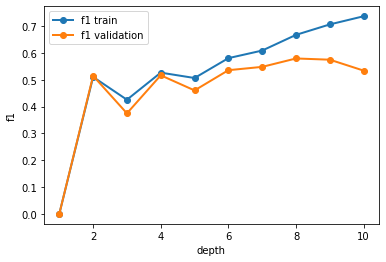

f1 наилучшей модели дерева решений на валидационной выборке: 0.5796269727403156
auc_roc наилучшей модели дерева решений на валидационной выборке: 0.8073674599098327
Глубина дерева решений: 8


In [74]:
# создадим функцию для подбора параметров дерева решений с графиком

def tree_model_search(train_features, train_target, valid_features, valid_target, class_weight=None):
    model_best = None
    depth_best = 0
    f1_best = 0
    auc_roc_model = 0
    graf_train = []
    graf_valid = []
    
    for depth in range(1, 11):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=class_weight)
        model.fit(train_features, train_target)
        train_predicted = model.predict(train_features)
        valid_predicted = model.predict(valid_features)
        train_f1 = f1_score(train_target, train_predicted)
        valid_f1 = f1_score(valid_target, valid_predicted)
        valid_probabilities_one = model.predict_proba(valid_features)[:, 1]
        auc_roc = roc_auc_score(valid_target, valid_probabilities_one)
        graf_train.append(train_f1)
        graf_valid.append(valid_f1)
        if valid_f1 > f1_best:
            f1_best = valid_f1
            auc_roc_model = auc_roc
            depth_best = depth
            model_best = model
            
    graf_train = pd.Series(graf_train)
    graf_valid = pd.Series(graf_valid)
    graf_train.index += 1
    graf_valid.index += 1
    graf_train.plot(linewidth = 2, marker = 'o')
    graf_valid.plot(linewidth = 2, marker = 'o')
    plt.xlabel('depth')
    plt.ylabel('f1')
    plt.legend(['f1 train', 'f1 validation'])
    plt.show()    
    
    print("f1 наилучшей модели дерева решений на валидационной выборке:", f1_best)
    print("auc_roc наилучшей модели дерева решений на валидационной выборке:", auc_roc_model)
    print("Глубина дерева решений:", depth_best)
    
    return model_best, f1_best, depth_best

# вызовем функцию

model_tree, f1_tree_model, depth_tree_model = tree_model_search(train_features, train_target, valid_features, valid_target)

In [75]:
%%time
# рассчет около 2 минут будет, налейте себе кофейку :)
parametrs = {'n_estimators': range(5, 71, 5),
            'max_depth': range(1, 11)}

# создадим функцию для подбора параметров Случайного леса

def forest_model_search(train_features, train_target, valid_features, valid_target, parametrs, class_weight=None):
    grid_model = RandomForestClassifier(random_state=12345, class_weight=class_weight)
    grid = GridSearchCV(grid_model, parametrs)
    grid.fit(train_features, train_target)

    model_best = grid.best_estimator_
    model_best_predicted = model_best.predict(valid_features) 
    f1_model_best = f1_score(valid_target, model_best_predicted)
    valid_probabilities_one = model_best.predict_proba(valid_features)[:, 1]
    auc_roc_model = roc_auc_score(valid_target, valid_probabilities_one)
    depth_best = grid.best_params_['max_depth']
    n_estimators_best = grid.best_params_['n_estimators']


    print("f1 наилучшей модели случайного леса на валидационной выборке:", f1_model_best)
    print("auc_roc наилучшей модели случайного леса на валидационной выборке:", auc_roc_model)
    print("Число деревьев решений:", n_estimators_best)
    print("Максимальная глубина деревьев решений:", depth_best)
    
    return model_best, f1_model_best, depth_best, n_estimators_best

# вызовем функцию

model_forest, f1_forest_model, depth_forest_model, n_estimators_forest_model = forest_model_search(train_features, train_target, valid_features, valid_target, parametrs)

f1 наилучшей модели случайного леса на валидационной выборке: 0.5504885993485342
auc_roc наилучшей модели случайного леса на валидационной выборке: 0.8691696318814963
Число деревьев решений: 45
Максимальная глубина деревьев решений: 10
CPU times: total: 1min 56s
Wall time: 1min 56s


In [76]:
# создадим функцию для подбора параметров Логистической регрессии

def lr_model_search(train_features, train_target, valid_features, valid_target, class_weight=None):
    model_best = None
    f1_best = 0
    auc_roc_model = 0
    iter_best = 0

    for iter in range(100, 1001, 100):
        model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iter, class_weight=class_weight)
        model.fit(train_features, train_target)
        valid_probabilities_one = model.predict_proba(valid_features)[:, 1]
        valid_predicted = model.predict(valid_features)
        valid_f1 = f1_score(valid_target, valid_predicted)
        auc_roc = roc_auc_score(valid_target, valid_probabilities_one)
        if valid_f1 > f1_best:
            model_best = model
            f1_best = valid_f1
            iter_best = iter
            auc_roc_model = auc_roc

    print("f1 наилучшей модели логистической регрессии на валидационной выборке:", f1_best)
    print("auc_roc наилучшей модели логистической регрессии на валидационной выборке:", auc_roc_model)
    print("Максимальное число итераций:", iter_best)
    
    return model_best, f1_best, iter_best

# вызовем функцию

lr_model, f1_lr_model, iter_lr_model = lr_model_search(train_features, train_target, valid_features, valid_target)

f1 наилучшей модели логистической регрессии на валидационной выборке: 0.3214953271028037
auc_roc наилучшей модели логистической регрессии на валидационной выборке: 0.7874669739076519
Максимальное число итераций: 100


### Вывод

По результату проверки моделей и подбора параметров видим, что наилучший результат f1-меры дала модель Дерева решений с максимальной глубиной 8.

Лучший показатель auc_roc у Случайного леса с глубиной 10 и числом деревьев 50.

## Борьба с дисбалансом

Найдем лучшую модель, после устранения дисбаланса классов целевого признака. Проверим показатель f1 каждой модели после:
* Взвешивания классов.
* Увеличения выборки.
* Уменьшения выборки.
* Смещения порога (для Логистической регрессии).

### Взвешивание классов

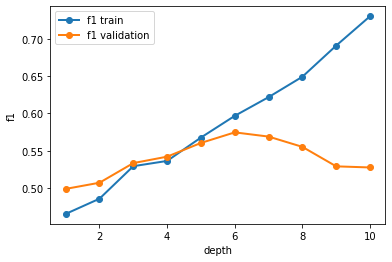

f1 наилучшей модели дерева решений на валидационной выборке: 0.5747330960854092
auc_roc наилучшей модели дерева решений на валидационной выборке: 0.8353337929609115
Глубина дерева решений: 6


In [77]:
# обучим модель Дерева решений с балансировкой

model_tree_balanced, f1_tree_model_balanced, depth_tree_model_balanced = tree_model_search(
    train_features, train_target, valid_features, valid_target, class_weight='balanced')


In [78]:
%%time
# еще 2 минутки

# обучим модель Случайного леса с балансировкой

model_forest_balanced, f1_forest_model_balanced, depth_forest_model_balanced, n_estimators_forest_model_balanced = forest_model_search(
    train_features, train_target, valid_features, valid_target, parametrs, class_weight='balanced')

f1 наилучшей модели случайного леса на валидационной выборке: 0.6369119420989143
auc_roc наилучшей модели случайного леса на валидационной выборке: 0.8631867614918463
Число деревьев решений: 70
Максимальная глубина деревьев решений: 10
CPU times: total: 2min 2s
Wall time: 2min 2s


In [79]:
# обучим модель по алгоритму логистическо регрессии

model_lr_balanced, f1_lr_model_balanced, lr_iter_balanced = lr_model_search(
    train_features, train_target, valid_features, valid_target, class_weight='balanced')

f1 наилучшей модели логистической регрессии на валидационной выборке: 0.5113043478260869
auc_roc наилучшей модели логистической регрессии на валидационной выборке: 0.7917840799196731
Максимальное число итераций: 100


Мы получили существенно лучший результат f1-меры для Случайного леса и Логистической регрессии, чем для модели без балансировки. Для Дерева решений результат стал немного хуже.

auc_roc вырос для Дерева решений и Логистической регрессии.

Посмотрим другие методы балансировки.

### Увеличение выборки

In [80]:
# увеличим выборку

def upsample(features, target, repiat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = shuffle(pd.concat([features_zeros] + [features_ones] * repiat), random_state=12345)
    target_upsampled = shuffle(pd.concat([target_zeros] + [target_ones] * repiat), random_state=12345)
    
    return features_upsampled, target_upsampled

upsampled_features, upsampled_target = upsample(train_features, train_target, 4)

# проверим соотношение в выборке после балансировки
print('Распределение классов в целевом признаке:')
print(upsampled_target.value_counts())
print()

Распределение классов в целевом признаке:
1    4892
0    4777
Name: exited, dtype: int64



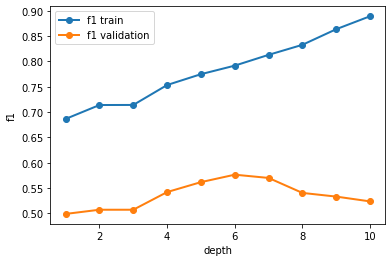

f1 наилучшей модели дерева решений на валидационной выборке: 0.576544315129812
auc_roc наилучшей модели дерева решений на валидационной выборке: 0.8364173109935821
Глубина дерева решений: 6


In [81]:
# обучим модель Дерева решений по увеличенной выборке

model_tree_upsampled, f1_tree_model_upsampled, max_depth_model_tree_upsampled = tree_model_search(
    upsampled_features, upsampled_target, valid_features, valid_target)

In [82]:
%%time
# снова 3 минуты

# обучим модель Случайного леса по увеличенной выборке

model_forest_upsampled, f1_forest_model_upsampled, max_depth_model_forest_upsampled, n_estimators_forest_model_upsampled = forest_model_search(
    upsampled_features, upsampled_target, valid_features, valid_target, parametrs)

f1 наилучшей модели случайного леса на валидационной выборке: 0.6275787187839305
auc_roc наилучшей модели случайного леса на валидационной выборке: 0.86415999975322
Число деревьев решений: 70
Максимальная глубина деревьев решений: 10
CPU times: total: 2min 42s
Wall time: 2min 43s


In [83]:
# обучим модель по алгоритму логистическо регрессии по увеличенной выборке

model_lr_upsampled, f1_lr_model_upsampled, lr_iter_upsampled = lr_model_search(
    upsampled_features, upsampled_target, valid_features, valid_target)

f1 наилучшей модели логистической регрессии на валидационной выборке: 0.5068493150684932
auc_roc наилучшей модели логистической регрессии на валидационной выборке: 0.7918565715175885
Максимальное число итераций: 100


Мы получили существенно лучший результат f1 для Случайного леса и Логистической регрессии, чем для модели без балансировки. Для Дерева решений результат стал совсем немного хуже.

Относительно Взвешивания классов, Увеличение выборки дало лучший резултат только для Дерева решений.

auc_roc практически такой же как при Взвешивании классов.

### Уменьшение выборки

In [84]:
# уменьшим выборку

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = shuffle(pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]), random_state=12345)
    target_downsampled = shuffle(pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]), random_state=12345)
    
    return features_downsampled, target_downsampled

downsampled_features, downsampled_target = downsample(train_features, train_target, 0.25)

# проверим соотношение в выборке после балансировки
print('Распределение классов в целевом признаке:')
print(downsampled_target.value_counts())
print()

Распределение классов в целевом признаке:
1    1223
0    1194
Name: exited, dtype: int64



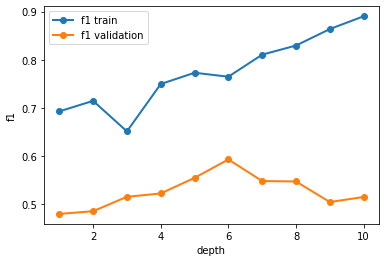

f1 наилучшей модели дерева решений на валидационной выборке: 0.5933400605449041
auc_roc наилучшей модели дерева решений на валидационной выборке: 0.8435207164020724
Глубина дерева решений: 6


In [85]:
# обучим модель Дерева решений по уменьшенной выборке

model_tree_downsampled, f1_tree_model_downsampled, max_depth_model_tree_downsampled = tree_model_search(
    downsampled_features, downsampled_target, valid_features, valid_target)

In [86]:
%%time
# ещё 2 минуты

# обучим модель Случайного леса по уменьшенной выборке

model_forest_downsampled, f1_forest_model_downsampled, max_depth_model_forest_downsampled, n_estimators_forest_model_downsampled = forest_model_search(
    downsampled_features, downsampled_target, valid_features, valid_target, parametrs)

f1 наилучшей модели случайного леса на валидационной выборке: 0.6073194856577646
auc_roc наилучшей модели случайного леса на валидационной выборке: 0.8722003976241264
Число деревьев решений: 50
Максимальная глубина деревьев решений: 7
CPU times: total: 1min 29s
Wall time: 1min 30s


In [87]:
# обучим модель по алгоритму логистическо регрессии по уменьшенной выборке

model_lr_downsampled, f1_lr_model_downsampled, lr_iter_downsampled = lr_model_search(
    downsampled_features, downsampled_target, valid_features, valid_target)

f1 наилучшей модели логистической регрессии на валидационной выборке: 0.5042881646655232
auc_roc наилучшей модели логистической регрессии на валидационной выборке: 0.791184096268842
Максимальное число итераций: 100


Для Дерева решений получили результат существенно лучший, чем при увеличении выборки, взвешивании классов, отсутсвии балансировки.

Для Случайного леса и Логистической регресии результат лучше, чем без балансировки, но хуже, чем при взвешивании и увеличении выборки.

auc_roc для Случайного леса и Дерева решений стал выше.

### Смещения порога

Для модели логистической регрессии исследуем также Смещение порога.

Лучший показатель f1 0.526 достигается при пороге 0.260. При этом auc_roc равен 0.716


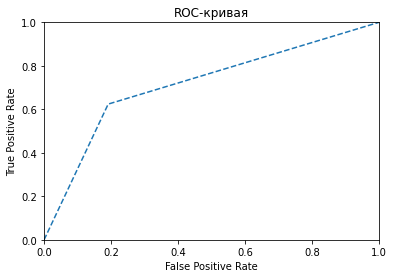

In [88]:
# получим список вероятностей положительных предсказаний исходной модели 
valid_probabilities_one = lr_model.predict_proba(valid_features)[:, 1]

f1_lr_model_best = 0
auc_roc_lr_model_best = 0
threshold_best = 0
valid_predicted_best = None

# в цикле получим знчения f1-меры при разных значениях порога чувствительности
for threshold in np.arange(0, 0.99, 0.02):
    valid_predicted = valid_probabilities_one > threshold
    f1_lr_model_shift = f1_score(valid_target, valid_predicted)
    auc_roc_lr_model_shift = roc_auc_score(valid_target, valid_predicted)
    if f1_lr_model_shift > f1_lr_model_best:
        f1_lr_model_best = f1_lr_model_shift
        auc_roc_lr_model_best = auc_roc_lr_model_shift
        threshold_best = threshold
        valid_predicted_best = valid_predicted

print(f'Лучший показатель f1 {f1_lr_model_best:0.3f} достигается при пороге {threshold_best:0.3f}. При этом auc_roc равен {auc_roc_lr_model_best:0.3f}')
fpr, tpr, thresholds = roc_curve(valid_target, valid_predicted_best)
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Снижение порога до 0.26 дало результат, однако лучшей, по-прежнему, остается модель Случайного леса после применения Взвешивания классов.

### Вывод

* Для Дерева решений лучший результат дала балансировка методом Уменьшения выборки.
* Случайного леса и Логистической регресии лучший результат дала балансировка методом Взвешивания классов.
* Наилучший результат на валидационной выборке показала модель Случайного леса при Взвешивания классов.

Параметры лучшей модели:
* Случайный лес
* Число деревьев решений: 70
* Максимальная глубина деревьев решений: 10

## Тестирование модели

Проверим лучшую модель на тестовой выборке.

In [89]:
test_predicted = model_forest_balanced.predict(test_features)
f1_test = f1_score(test_target, test_predicted)

print('f1 наилучшей модели случайного леса на тестовой выборке:', f1_test)

f1 наилучшей модели случайного леса на тестовой выборке: 0.6415552855407047


f1 для тестовой выборки даже выше, чем для валидационной.

## Вывод

Нам удалось построить модель со значением F1-меры 0.64.

Наилучший результат в нашем случае дала модель Случайного леса после Взвешивания классов.

Можем отметить, что для всех моделей с помощью устранения дисбаланса в данных нам удалось добиться улучшения показателя f1.
При этом:
* Для Дерева решений эффективнее всего оказалось уменьшение выборки.
* Для Случайного леса - Взвешивание классов.
* Для Логистической регрессии - Изменение порога чувствительности.

Налучший результат по auc_roc показал Случайный лес после уменьшения выборки.

Это не означает, что для каждой из моделей предпочтителен определенный вид устранения дисбаланса. На других выборках результат может существенно отличаться.